In [1]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 19.1 MB/s eta 0:00:00


[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Number of positive: 184, number of negative: 446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000134 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 630
[LightGBM] [Info] Number of data points in the train set: 630, number of used features: 15
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.292063 -> initscore=-0.885383
[LightGBM] [Info] Start training from score -0.885383
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until

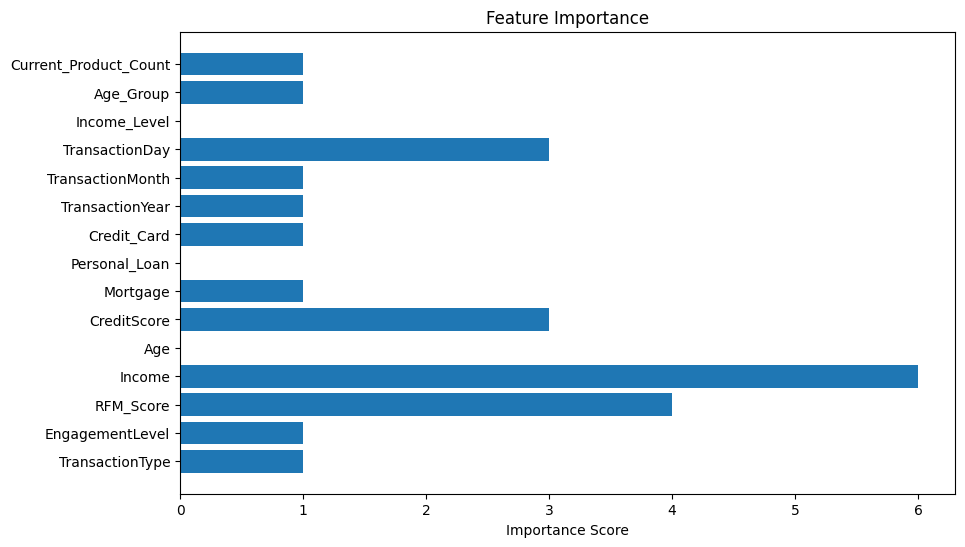

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_auc_score, average_precision_score
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("D:/Jupyter_projects/RFM_loan/simulated_lendingclub_dataset_enhanced.csv")

# Encoding categorical variables
label_encoders = {}
for col in ['TransactionType', 'EngagementLevel', 'Income_Level', 'Age_Group']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Splitting the data into features and target variable
X = data.drop(columns=['Exited', 'CustomerID'])
y = data['Exited']

# Scaling continuous variables
scaler = StandardScaler()
continuous_features = ['RFM_Score', 'Income', 'Age', 'CreditScore', 'Current_Product_Count']
X[continuous_features] = scaler.fit_transform(X[continuous_features])

# Splitting into training, validation, and test sets
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.1, random_state=42
)

# Setting up LightGBM Classifier with early stopping in the constructor
lgbm_classifier = LGBMClassifier(
    objective="binary",
    n_estimators=500,
    learning_rate=0.05,
    max_depth=10,
    num_leaves=31,
    random_state=42,
    early_stopping_rounds=50,
    eval_metric="auc"
)

# Train the classifier
lgbm_classifier.fit(
    X_train,
    y_train,
    eval_set=[(X_val, y_val)]
)

# Predictions and evaluation
y_pred = lgbm_classifier.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred)
avg_precision = average_precision_score(y_test, y_pred)

print("ROC AUC Score:", roc_auc)
print("Average Precision Score:", avg_precision)

# Feature Importance Plotting
importances = lgbm_classifier.feature_importances_
feature_names = X_train.columns
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.show()


[LightGBM] [Info] Number of positive: 209, number of negative: 491
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 670
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.298571 -> initscore=-0.854110
[LightGBM] [Info] Start training from score -0.854110
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

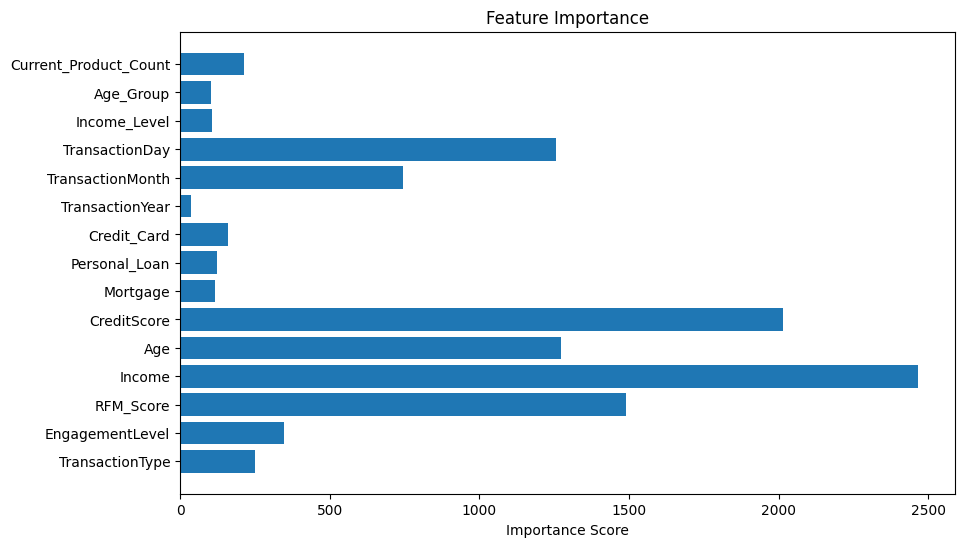

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_auc_score, average_precision_score
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("D:/Jupyter_projects/RFM_loan/simulated_lendingclub_dataset_enhanced.csv")

# Encoding categorical variables
label_encoders = {}
for col in ['TransactionType', 'EngagementLevel', 'Income_Level', 'Age_Group']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Splitting the data into features and target variable
X = data.drop(columns=['Exited', 'CustomerID'])  # Dropping irrelevant columns
y = data['Exited']

# Scaling continuous variables
scaler = StandardScaler()
continuous_features = ['RFM_Score', 'Income', 'Age', 'CreditScore', 'Current_Product_Count']
X[continuous_features] = scaler.fit_transform(X[continuous_features])

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Setting up LightGBM Classifier
lgbm_classifier = LGBMClassifier(
    objective="binary",
    n_estimators=500,
    learning_rate=0.05,
    max_depth=10,
    num_leaves=31,
    random_state=42
)

# Train the classifier
lgbm_classifier.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric="auc")

# Predictions and evaluation
y_pred = lgbm_classifier.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred)
avg_precision = average_precision_score(y_test, y_pred)

print("ROC AUC Score:", roc_auc)
print("Average Precision Score:", avg_precision)

# Feature Importance Plotting
importances = lgbm_classifier.feature_importances_
feature_names = X_train.columns
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.show()
